In [1]:
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [23]:
#2018
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2018-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["F","TSLA", "GM"]

# Get 3 year's worth of historical price data for Ford, Tesla, GMC
df2018_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df2018_ticker.head()

F                                    GM         \
                            open   high    low  close    volume   open   high   
time                                                                            
2018-01-02 00:00:00-05:00  12.52  12.66  12.50  12.65  16690873  41.24  41.87   
2018-01-03 00:00:00-05:00  12.68  12.80  12.67  12.75  24832828  42.21  42.95   
2018-01-04 00:00:00-05:00  12.78  13.04  12.77  12.98  33286107  43.09  44.25   
2018-01-05 00:00:00-05:00  13.06  13.22  13.04  13.19  37620628  44.50  44.64   
2018-01-08 00:00:00-05:00  13.21  13.22  13.11  13.14  21863372  44.04  44.59   

                                                        TSLA            \
                               low   close    volume    open      high   
time                                                                     
2018-01-02 00:00:00-05:00  41.1500  41.810   5775050  312.18  322.1099   
2018-01-03 00:00:00-05:00  42.2000  42.815  10845178  321.00  325.2500   
2018-01-04 00:00:00-05:00  43.0500  44.140  14952993  312.87  318.5500   
2018-01-05 00:00:00-05:00  43.9600  44.004   8063566  316.62  317.2400   
2018-01-08 00:00:00-05:00  43.5201  44.220   9808090  316.00  337.0199   

                                                    
                              low   close   volume  
time                                                
2018-01-02 00:00:00-05:00  311.00  320.29  3322648  
2018-01-03 00:00:00-05:00  315.55  317.01  3232166  
2018-01-04 00:00:00-05:00  305.68  314.62  7428996  
2018-01-05 00:00:00-05:00  312.00  316.55  3563882  
2018-01-08 00:00:00-05:00  315.50  336.41  7721537

In [24]:
#2019
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2019-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2019-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["F","TSLA", "GM"]

# Get 3 year's worth of historical price data for Ford, Tesla, GMC
df2019_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df2019_ticker.head()

F                                    GM  \
                           open   high   low   close    volume   open   
time                                                                    
2019-01-02 00:00:00-05:00  7.53  8.020  7.48  7.8950  40792880  32.85   
2019-01-03 00:00:00-05:00  7.97  7.990  7.78  7.8000  34718602  33.34   
2019-01-04 00:00:00-05:00  7.91  8.120  7.85  8.0750  36423894  32.80   
2019-01-07 00:00:00-05:00  8.11  8.365  7.85  8.2999  32987511  33.71   
2019-01-08 00:00:00-05:00  8.42  8.540  7.90  8.3750  40123824  35.00   

                                                              TSLA          \
                              high    low   close   volume    open    high   
time                                                                         
2019-01-02 00:00:00-05:00  33.8050  32.41  33.585  6498614  306.50  315.13   
2019-01-03 00:00:00-05:00  33.6800  32.22  32.290  9543046  307.00  309.40   
2019-01-04 00:00:00-05:00  33.5711  32.43  33.365  8804555  306.00  318.00   
2019-01-07 00:00:00-05:00  34.9650  33.48  34.420  8256201  321.66  336.74   
2019-01-08 00:00:00-05:00  35.6800  34.49  34.850  8938684  341.98  344.01   

                                                         
                                low     close    volume  
time                                                     
2019-01-02 00:00:00-05:00  298.8000  309.8699  10751296  
2019-01-03 00:00:00-05:00  297.3800  300.3100   6672221  
2019-01-04 00:00:00-05:00  302.7300  317.5400   6983846  
2019-01-07 00:00:00-05:00  317.7508  334.9860   7193888  
2019-01-08 00:00:00-05:00  327.0200  335.4900   6567180

In [5]:
# Create and empty DataFrame for closing prices
df2019_closing_prices = pd.DataFrame()

# Fetch the closing prices of KO and TSLA
df2019_closing_prices["F"] = df2019_ticker["F"]["close"]
df2019_closing_prices["TSLA"] = df2019_ticker["TSLA"]["close"]
df2019_closing_prices["GM"] = df2019_ticker["GM"]["close"]

# Drop the time component of the date
df2019_closing_prices.index = df2019_closing_prices.index.date

# Compute daily returns
df2019_daily_returns = df2019_closing_prices.pct_change().dropna()

# Display sample data
df2019_daily_returns.head(10)

,F,TSLA,GM
2019-01-03,-0.012033,-0.030851,-0.038559
2019-01-04,0.035256,0.057374,0.033292
2019-01-07,0.027851,0.054941,0.031620
2019-01-08,0.009048,0.001505,0.012493
2019-01-09,0.041194,0.009032,0.009613
2019-01-10,-0.004587,0.018876,-0.012932
2019-01-11,0.015553,0.007074,0.070688
2019-01-14,0.020420,-0.036419,0.013850
2019-01-15,-0.017788,0.028817,-0.004377
2019-01-16,-0.062060,0.004487,0.004529


In [6]:
df2019_daily_returns.describe()

,F,TSLA,GM
count,251.000000,251.000000,251.000000
mean,0.000797,0.001669,0.000462
std,0.017286,0.030809,0.015486
min,-0.076329,-0.136659,-0.046899
25%,-0.006816,-0.010849,-0.006734
50%,0.000000,0.001993,0.001336
75%,0.010016,0.017499,0.009345
max,0.106036,0.175492,0.070688


<AxesSubplot:ylabel='Frequency'>

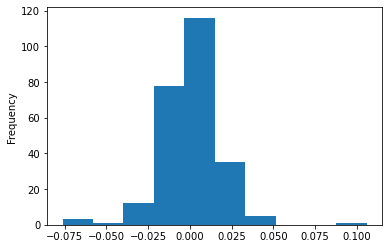

In [7]:
df2019_daily_returns["F"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

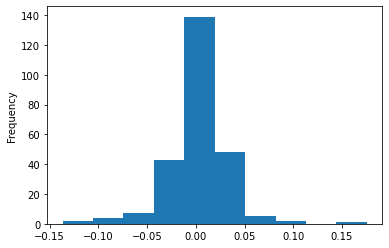

In [8]:
df2019_daily_returns["TSLA"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

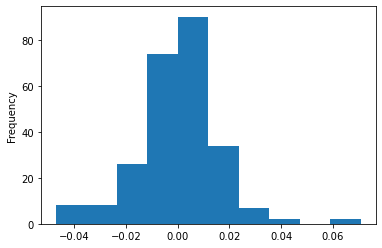

In [9]:
df2019_daily_returns["GM"].plot.hist()

In [10]:
df2019_daily_returns.head()

,F,TSLA,GM
2019-01-03,-0.012033,-0.030851,-0.038559
2019-01-04,0.035256,0.057374,0.033292
2019-01-07,0.027851,0.054941,0.031620
2019-01-08,0.009048,0.001505,0.012493
2019-01-09,0.041194,0.009032,0.009613


In [21]:
# Annual return
df2019_annual_returns = df2019_closing_prices.pct_change(251).dropna()
df2019_annual_returns.head()

,F,TSLA,GM
2019-12-31,0.176694,0.349502,0.089772


In [12]:
# Incorporate revenue data from excel file
from datetime import datetime,date
os.chdir(r"C:\Users\dmwal\Documents\FinTech2021\Project_1\Newly_Minted")
revenue_data = pd.read_excel("draft.xlsx")
#revenue_data.set_index("Date", inplace= True)
#revenue_data.index = pd.to_datetime(revenue_data.index)
revenue_data.head()
#revenue_data[‘revenue_data_pct_change’] = vix.sort_index(ascending=True).pct_change()
#total_returns = pd.merge(total_returns, vix.reset_index(), how=‘inner’, left_on= pd.to_datetime(total_returns[‘time’], utc=True).dt.date,right_on=pd.to_datetime(vix.reset_index()[‘Date’], utc=True).dt.date)
#total_returns.head()

,Ticker,Date,Revenue
0,TSLA,2019-01-01,500
1,TSLA,2020-01-01,600
2,TSLA,2021-01-01,700
3,F,2019-01-01,800
4,F,2020-01-01,300


In [13]:
df2019_annual_returns.head()

,F,TSLA,GM
2019-12-31,0.176694,0.349502,0.089772


In [14]:
df2019_annual_returns = pd.DataFrame(df2019_annual_returns.unstack())
df2019_annual_returns.reset_index(inplace = True)
df2019_annual_returns.head()

,level_0,level_1,0
0,F,2019-12-31,0.176694
1,TSLA,2019-12-31,0.349502
2,GM,2019-12-31,0.089772


In [16]:
df2019_annual_returns["level_1"] = pd.to_datetime(df2019_annual_returns["level_1"]).dt.year
revenue_data["Date"] = pd.to_datetime(revenue_data["Date"]).dt.year
revenue_data

,Ticker,Date,Revenue
0,TSLA,1970,500
1,TSLA,1970,600
2,TSLA,1970,700
3,F,1970,800
4,F,1970,300
5,F,1970,200


In [17]:
df2019_annual_returns

,level_0,level_1,0
0,F,1970,0.176694
1,TSLA,1970,0.349502
2,GM,1970,0.089772


In [18]:
df2019_annual_returns

,level_0,level_1,0
0,F,1970,0.176694
1,TSLA,1970,0.349502
2,GM,1970,0.089772


In [19]:
# Merge the two dataframes on the ticker and date
total_df = pd.merge(df2019_annual_returns, revenue_data, how="outer", left_on= ["level_0", "level_1"],right_on=["Ticker", "Date"])
total_df.head()

,level_0,level_1,0,Ticker,Date,Revenue
0,F,1970,0.176694,F,1970.0,800.0
1,F,1970,0.176694,F,1970.0,300.0
2,F,1970,0.176694,F,1970.0,200.0
3,TSLA,1970,0.349502,TSLA,1970.0,500.0
4,TSLA,1970,0.349502,TSLA,1970.0,600.0


In [25]:
#2020
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["F","TSLA", "GM"]

# Get 3 year's worth of historical price data for Ford, Tesla, GMC
df2020_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df2020_ticker.head()

F                                 GM         \
                           open  high   low close    volume   open   high   
time                                                                        
2020-01-02 00:00:00-05:00  9.29  9.42  9.19  9.42  37027636  37.00  37.38   
2020-01-03 00:00:00-05:00  9.31  9.37  9.15  9.21  36733714  36.73  36.92   
2020-01-06 00:00:00-05:00  9.10  9.17  9.06  9.15  31435591  35.95  36.18   
2020-01-07 00:00:00-05:00  9.20  9.25  9.12  9.25  35164362  35.75  35.84   
2020-01-08 00:00:00-05:00  9.23  9.30  9.17  9.25  39750601  35.04  35.20   

                                                     TSLA                     \
                             low  close    volume    open      high      low   
time                                                                           
2020-01-02 00:00:00-05:00  36.55  37.38   5911901  424.95  430.6957  421.710   
2020-01-03 00:00:00-05:00  36.11  36.30   7193403  440.50  454.0000  436.920   
2020-01-06 00:00:00-05:00  35.80  35.84   6534769  440.47  451.5600  440.000   
2020-01-07 00:00:00-05:00  34.74  35.15  13207500  461.40  471.6300  453.355   
2020-01-08 00:00:00-05:00  34.41  34.66  10722570  473.70  498.4900  468.230   

                                               
                              close    volume  
time                                           
2020-01-02 00:00:00-05:00  430.2400   9113793  
2020-01-03 00:00:00-05:00  442.7500  16409329  
2020-01-06 00:00:00-05:00  451.4001   9807049  
2020-01-07 00:00:00-05:00  469.1700  16859537  
2020-01-08 00:00:00-05:00  492.0900  29804104